# Task-1
	You need to translate each word or sentence from English to Spanish, French and German 


In [1]:
import pandas as pd
import numpy as np
import string

In [2]:
data = pd.read_csv("English.csv")

# Converting the data into lower case
data=data.apply(lambda x: x.astype(str).str.lower())
data

,English words/sentences
0,hi.
1,run!
2,run!
3,who?
4,wow!
...,...
175616,"top-down economics never works, said obama. ""t..."
175617,a carbon footprint is the amount of carbon dio...
175618,death is something that we're often discourage...
175619,since there are usually multiple websites on a...


In [3]:
# Remove punctuation
eng = np.array(data)
eng[:,0] = [s.translate(str.maketrans('', '', string.punctuation)) for s in eng[:,0]]
eng

array([['hi'],
       ['run'],
       ['run'],
       ...,
       ['death is something that were often discouraged to talk about or even think about but ive realized that preparing for death is one of the most empowering things you can do thinking about death clarifies your life'],
       ['since there are usually multiple websites on any given topic i usually just click the back button when i arrive on any webpage that has popup advertising i just go to the next page found by google and hope for something less irritating'],
       ['if someone who doesnt know your background says that you sound like a native speaker it means they probably noticed something about your speaking that made them realize you werent a native speaker in other words you dont really sound like a native speaker']],
      dtype=object)

In [4]:
# Converting in back into DataFrame
df = pd.DataFrame(eng, columns =['English words/sentences'])


# dropping ALL duplicate values
df.drop_duplicates(subset='English words/sentences',keep= "first", inplace=True)
df.shape

(122953, 1)

In [12]:
# The data given is too large even after removing duplicate values,
# So I converted the first 100 and last 100 as the combination of word and sentence. 

new_df = pd.concat([df.head(100),df.tail(100)])
new_df

,English words/sentences
0,hi
1,run
3,who
4,wow
5,fire
...,...
175616,topdown economics never works said obama the c...
175617,a carbon footprint is the amount of carbon dio...
175618,death is something that were often discouraged...
175619,since there are usually multiple websites on a...


In [5]:
!pip install -U deep-translator

In [13]:
# Using Google translator we are coverting the language

from deep_translator import GoogleTranslator

English_French=[]
English_Spanish=[]
English_Greman=[]

for word in new_df["English words/sentences"]:
    try:
        a = GoogleTranslator(source='auto', target='french').translate(word)
        b = GoogleTranslator(source='auto', target='spanish').translate(word)
        c = GoogleTranslator(source='auto', target='german').translate(word)
        English_French.append(a)
        English_Spanish.append(b)
        English_Greman.append(c)
    except:
        English_French.append("NaN")
        English_Spanish.append("NaN")
        English_Greman.append("NaN")

new_df["French"] = English_French
new_df["Spanish"] = English_Spanish
new_df["Greman"] = English_Greman

new_df.head(50)

,English words/sentences,French,Spanish,Greman
0,hi,salut,hola,hallo
1,run,Cours,correr,Lauf
3,who,qui,quién,wer
4,wow,wow,guau,Beeindruckend
5,fire,Feu,fuego,Feuer
6,help,aider,ayuda,Hilfe
7,jump,saut,salto,springen
8,stop,arrêt,deténgase,Pause
11,wait,Attendez,Espere,Warten
13,go on,continue,continuar,mach weiter


In [16]:
new_df.tail(50)

,English words/sentences,French,Spanish,Greman
175566,my mother always told me that i should put mon...,ma mère m'a toujours dit que je devais mettre ...,mi madre siempre me dijo que debería poner din...,"meine mutter hat mir immer gesagt, dass ich je..."
175567,the difference between the right word and almo...,la différence entre le mot juste et presque le...,la diferencia entre la palabra correcta y casi...,Der Unterschied zwischen dem richtigen Wort un...
175569,we see with our eyes we hear with our ears we ...,nous voyons avec nos yeux nous entendons avec ...,vemos con nuestros ojos oímos con nuestros oíd...,"Wir sehen mit unseren Augen, wir hören mit uns..."
175570,if you dont eat breakfast youll probably be hu...,"si vous ne prenez pas de petit-déjeuner, vous ...","Si no desayunas, probablemente tendrás hambre ...","Wenn Sie nicht frühstücken, werden Sie wahrsch..."
175572,one advantage of being old is that you no long...,l'un des avantages d'être vieux est que vous n...,Una ventaja de ser viejo es que ya no deseas t...,"ein vorteil des altseins ist, dass man all die..."
175573,i used to watch this anime a lot when i was a ...,je regardais beaucoup cet anime quand j'étais ...,"Solía ​​ver mucho este anime cuando era niño, ...","Ich habe diesen Anime oft gesehen, als ich ein..."
175574,in the same amount of time it would take me to...,dans le même laps de temps qu'il me faudrait p...,en la misma cantidad de tiempo que me tomaría ...,"In der gleichen Zeit, die ich brauchen würde, ..."
175575,the english language is undoubtedly the easies...,la langue anglaise est sans aucun doute le moy...,el idioma inglés es sin duda el medio más fáci...,die englische sprache ist zweifellos das einfa...
175576,i thought i had paid the monthly fee but i rec...,je pensais avoir payé les frais mensuels mais ...,"Pensé que había pagado la tarifa mensual, pero...","Ich dachte, ich hätte die monatliche Gebühr be..."
175577,a great relationship is based on two main prin...,une bonne relation est basée sur deux grands p...,una gran relación se basa en dos principios fu...,Eine großartige Beziehung basiert auf zwei Hau...


# Task-2
	
   Create a program that needs to automatically correct that spelling from the word or a given sentence. (Language : English) 

    Note:  show 100 data point outputs both in words and sentence. 


In [1]:
!pip install textblob

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)


In [21]:
from textblob import Word


def correct_word_spelling(word):
    word = Word(word)
    result = word.correct()
    return result
    
from textblob import TextBlob


def correct_sentence_spelling(sentence):
    sentence = TextBlob(sentence)
    result = sentence.correct()
    return result


txt_data =["gme","wiing","Scool","unlimmitted","lov","jmp","streeeet","spooorts",
            "hellllo","tre","animl","surrendr","corect","reslt","impot","juputer","entrin",
            "ccdin","trsted","bating","numer","liht","incom","litle","spelin","welome",
            "nework","limite","transulte","progranm","crete","prin","moday","tesday",
            "wedesday","thrsday","Frday","satrday","suday","janury","augut","september",
            "octiber","novenber","decenber","holyday","americo","mountaim","foresat","rier",
            "aset","resue","screeing","frenh","spanih","breakig","cookig","germa","hospita"
            "supprsing ones romantic felings is not the same as having no such felings",
            "the little grl deeply moved by the old mns pitiful story burst into ters",
            "the removal of the lodbearing beam copromised the structure of the bilding",
            "the stock market crash of otober 1987 in new york is still viidly reembered",
            "the whole comany stood in sience for a few momets as a tribute to the dead",
            "there are only five minutes left til the train leaves and she hasnt apeared",
            "there is no comprison beteen the taste of a fresh apricot and one from a can",
            "those birs build their nests in the suer and fly to the south in the winter",
            "those who use forks or chosticks often think peple who dont are unclized",
            "i dont lke sand its coarse and rogh and iitating and it gets eerywhere",
            "i dont obect to your ging out to work but who will look after the cildren",
            "i dont think that itll rain but ill take an ubrella with me just in cse",
            "i dont thin that were going to be able to catch the trin you want to ctch",
            "i tried to do my hoework but i didnt really know how to do it so i gve up",
            "i want to be able to walk down this stret withut worrying about gtting shot",
            "i wish i could take back all those teible things i said about you last night",
            "im calling to see if youd be inerested in going to boton with me next week",
            "if you forget to take your plls for one day take two pills the foowing day",
            "do you thnk that any really sart person is inerently interested in lanuages",
            "having finshed all her housework she sat down on the sofa to watch tlevision",
            "he believed that blacks could win their fight for equal rights without vilence",
            "he says that he saw nthing however i dont believe what he says is the tuth",
            "he soon grows tired of a thing rgardless of how much he lked it to begin with",
            "how much time and energy do you spend on prjects that dont make you any mney",
            "when you have a qustion ask the techer",
            "wheher you like it or not doesnt mater",
            "which color do you like more bue or red",
            "while youre yong you should read a lot",
            "white capets are very hard to keep clean",
            "who do you think came to see me ysterday",
            "who is the gntleman all dresed in black",
            "who is the man that you were tlking with",
            "who told you to write with your lft hand",
            "whos taking respsibility for this mess",
            "why did you buy this exensive dictionary",
            "why do you let pople treat you like that",
            "why do you send so much time wtching tv",
            "why do you want to know what im thking",
            "you must not make noises in the clsroom",
            "you must prctice it at regular intrvals",
            "you must work hard if you want to suceed",
            "you need to be here by 230 at the latst",
            "you need to buy some fruit and vegtables",
            "you never know what the fture will bring",
            "you really sholdve told tom not to come",
            "you really shouldnt use pirated sotware",
            "you run into jaanese tourists eerywhere",
            "you seem to be in such a nasy mood today",
            "you should be able to do this by youself",
            "you should be carful in choosing friends",
            "you should be more careful at a crowalk",
            "you should do whtever you think is right"] 

crt_txt_data=[]
for i in txt_data:
    if len(i) < 15:
        a = correct_word_spelling(i)
        crt_txt_data.append(a)
    else:
        a = correct_sentence_spelling(i)
        crt_txt_data.append(a)
       
crt_txt_data

['me',
 'wing',
 'Cool',
 'unlimited',
 'love',
 'jump',
 'street',
 'sports',
 'hello',
 'the',
 'animal',
 'surrender',
 'correct',
 'result',
 'import',
 'jupiter',
 'entering',
 'chin',
 'trusted',
 'eating',
 'number',
 'light',
 'income',
 'little',
 'spain',
 'welcome',
 'network',
 'limited',
 'translate',
 'program',
 'create',
 'pain',
 'today',
 'tuesday',
 'wednesday',
 'thursday',
 'Day',
 'saturday',
 'sunday',
 'january',
 'august',
 'september',
 'october',
 'november',
 'december',
 'holiday',
 'america',
 'mountain',
 'forest',
 'river',
 'set',
 'rescue',
 'screwing',
 'french',
 'spanish',
 'breaking',
 'cooking',
 'german',
 TextBlob("hospitasupprsing ones romantic feelings is not the same as having no such feelings"),
 TextBlob("the little girl deeply moved by the old mrs pitiful story burst into tears"),
 TextBlob("the removal of the lodbearing beam compromised the structure of the building"),
 TextBlob("the stock market crash of october 1987 in new york is still

# Task-3
	
    Create an application that should be used by the HR Team to filter the resume based on the Skills.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [4]:
# Reading the data

resumeDataSet = pd.read_csv('UpdatedResumeDataSet.csv' ,encoding='utf-8')
resumeDataSet['cleaned_resume'] = ''

resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [5]:
# Dataset Information

print("Dataset Information","\n","\n")
print(resumeDataSet.info(),"\n")
print("\n","-------------------------------------------------------------------------------------------------","\n")
print ("Displaying the distinct categories of resume:\n ")
print (resumeDataSet['Category'].unique(),"\n")
print("\n","-------------------------------------------------------------------------------------------------","\n")
print ("Displaying the distinct categories of resume and the number of records belonging to each category:\n")
print (resumeDataSet['Category'].value_counts())

Dataset Information 
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        962 non-null    object
 1   Resume          962 non-null    object
 2   cleaned_resume  962 non-null    object
dtypes: object(3)
memory usage: 22.7+ KB
None 


 ------------------------------------------------------------------------------------------------- 

Displaying the distinct categories of resume:
 
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing'] 


 -----------------------------------------------------

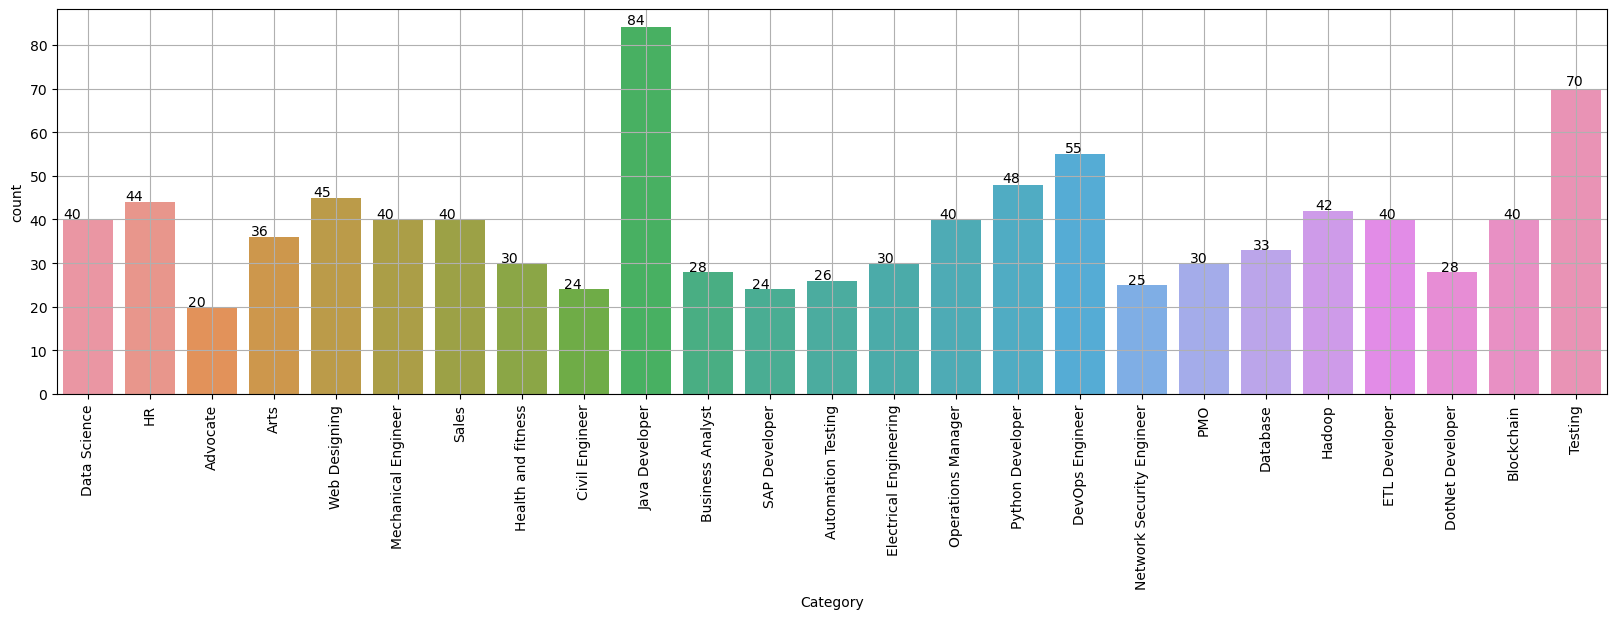

In [6]:
# Visualization of category

import seaborn as sns
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)

ax=sns.countplot(x="Category", data=resumeDataSet)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

In [7]:
import re
def cleanResume(resumeText):
    # remove URLs
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  
    # remove RT and cc
    resumeText = re.sub('RT|cc', ' ', resumeText)  
    # remove hashtags
    resumeText = re.sub('#\S+', '', resumeText) 
    # remove mentions
    resumeText = re.sub('@\S+', '  ', resumeText)  
    # remove punctuations
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    # remove extra whitespace
    resumeText = re.sub('\s+', ' ', resumeText)  
    return resumeText
    
# Inserting the cleaned data into the new column
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [8]:
resumeDataSet_d = resumeDataSet.copy()
!pip install wordcloud

  Using cached wordcloud-1.8.2.2-cp39-cp39-win_amd64.whl (153 kB)


In [9]:
# Removeing stopwords

import nltk
from nltk.corpus import stopwords
import string

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resumeDataSet['Resume'].values
cleanedSentences = ""

for records in Sentences:
    cleanedText = cleanResume(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('Exprience', 3829), ('months', 3233), ('company', 3130), ('Details', 2967), ('description', 2634), ('1', 2134), ('Project', 1808), ('project', 1579), ('6', 1499), ('data', 1438), ('team', 1424), ('Maharashtra', 1385), ('year', 1244), ('Less', 1137), ('January', 1086), ('using', 1041), ('Skill', 1018), ('Pune', 1016), ('Management', 1010), ('SQL', 990), ('Ltd', 934), ('management', 927), ('C', 896), ('Engineering', 855), ('Education', 833), ('Developer', 806), ('Java', 773), ('2', 754), ('development', 752), ('monthsCompany', 746), ('Pvt', 730), ('application', 727), ('System', 715), ('reports', 697), ('business', 696), ('India', 693), ('requirements', 693), ('I', 690), ('various', 688), ('A', 688), ('Data', 674), ('The', 672), ('University', 656), ('process', 648), ('Testing', 646), ('test', 638), ('Responsibilities', 637), ('system', 636), ('testing', 634), ('Software', 632)]


In [10]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])

resumeDataSet.head()

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [11]:
#understanding decode LabelEncoder
print(resumeDataSet.Category.value_counts(),"\n")
print("\n","-------------------------------------------------------------------------------------------------","\n")
print(resumeDataSet_d.Category.value_counts())

#clearing the space occupied 
del resumeDataSet_d 

15    84
23    70
8     55
20    48
24    45
12    44
13    42
3     40
10    40
18    40
6     40
22    40
16    40
1     36
7     33
11    30
14    30
19    30
4     28
9     28
2     26
17    25
21    24
5     24
0     20
Name: Category, dtype: int64 


 ------------------------------------------------------------------------------------------------- 

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Au

In [12]:
#Splitting and vectorizing the data

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(769, 7351)
(193, 7351)


In [13]:
# KNeighborsClassifier
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)

prediction = clf.predict(X_test)

print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set:     0.98


In [14]:
# Reports
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       0.75      0.60      0.67         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       0.89      1.00      0.94         8
           7       1.00      0.86      0.92         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         8
          11       0.86      1.00      0.92         6
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.

# # Task-4
	# Create a chatbot for Hotel Management to Book Rooms 

Details collected from : Customer Name, Mobile Number, Address, ID proof, and Room Type and date of arrival and departure date. Keep some eligibility to Book the Room .
All through voice to text classifications


In [3]:
!pip install speechrecognition
!pip install pyaudio
!pip install pyttsx3

In [3]:
import pyttsx3
import random
import datetime
import speech_recognition as sr
r=sr.Recognizer()
   
# Global List Declaration 
name = []
phno = []
add = []
checkin = []
checkout = []
room = []
price = []
rc = []
p = []
roomno = []
custid = []
day = []
ID = []
AGE = []

def SpeakText(command):
    engine = pyttsx3.init()
    engine.say(command)
    engine.runAndWait()
    

def speech_to_text():
    with sr.Microphone() as source2:
        print("start")
        r.adjust_for_ambient_noise(source2,duration=0.5)
        audio2=r.listen(source2, timeout=5, phrase_time_limit=5)
        MyText=r.recognize_google(audio2)
        MyText=MyText.lower()
    try:
        return(MyText)
    except:
        SpeakText("No User Voice detected OR unintelligible noises detected OR the recognized audio cannot be matched to text !!!")
     
    
# Global Variable Declaration 
i = 0
   
# Home Function
def Home():
      
    print("\t\t\t\t\t\t WELCOME TO HOTEL GUVI\n")
    print("\t\t\t 1 Booking\n")
    print("\t\t\t 2 Rooms Info\n")
    print("\t\t\t 3 Room Menu Card\n")
    print("\t\t\t 5 Record\n")
    print("\t\t\t 0 Exit\n")
    
    SpeakText("WELCOME TO HOTEL GUVI")
    SpeakText("Would you like to Book a room")
    SpeakText("Would you like to know rooms information")
    SpeakText("Would you like to see room menu card")
    SpeakText("Would you like to see record")
   
    ch=speech_to_text()
      
    if ch == "booking":
        print(" ")
        Booking()
      
    elif ch == "information":
        print(" ")
        Rooms_Info()
      
    elif ch == "menu":
        print(" ")
        restaurant()
      
    elif ch == "record":
        print(" ")
        Record()
      
    else:
        exit()
   

# Function used in booking
   
def date(c):
      
    if c[2] >= 2019 and c[2] <= 2020:
          
        if c[1] != 0 and c[1] <= 12:
              
            if c[1] == 2 and c[0] != 0 and c[0] <= 31:
                  
                if c[2]%4 == 0 and c[0] <= 29:
                    pass
                  
                elif c[0]<29:
                    pass
                  
                else:
                    
                    print("Invalid date\n")
                    SpeakText("Invalid date")
                    name.pop(i)
                    phno.pop(i)
                    add.pop(i)
                    checkin.pop(i)
                    checkout.pop(i)
                    Booking()
              
              
            # if month is odd & less than equal 
            # to 7th  month 
            elif c[1] <= 7 and c[1]%2 != 0 and c[0] <= 31:
                pass
              
            # if month is even & less than equal to 7th
            # month and not 2nd month
            elif c[1] <= 7 and c[1]%2 == 0 and c[0] <= 30 and c[1] != 2:
                pass
              
            # if month is even & greater than equal 
            # to 8th  month
            elif c[1] >= 8 and c[1]%2 == 0 and c[0] <= 31:
                pass
              
            # if month is odd & greater than equal
            # to 8th  month
            elif c[1]>=8 and c[1]%2!=0 and c[0]<=30:  
                pass
              
            else: 
                
                print("Invalid date\n")
                SpeakText("Invalid date")
                name.pop(i)
                phno.pop(i)
                add.pop(i)
                checkin.pop(i)
                checkout.pop(i)
                Booking()
                  
        else:
            
            print("Invalid date\n")
            SpeakText("Invalid date")
            name.pop(i)
            phno.pop(i)
            add.pop(i)
            checkin.pop(i)
            checkout.pop(i)
            Booking()
              
    else:
        
        print("Invalid date\n")
        SpeakText("Invalid date")
        name.pop(i)
        phno.pop(i)
        add.pop(i)
        checkin.pop(i)
        checkout.pop(i)
        Booking()
   
   
# Booking function 
def Booking():  
        # used global keyword to 
        # use global variable 'i'
        global i
        print(" BOOKING ROOMS")
        SpeakText("BOOKING ROOMS")
        print(" ")
          
        while 1:
            
            SpeakText("May i know your Name  sir")
            n = speech_to_text()
            print("Name:",n)
            
            SpeakText("Phone Number")
            p1 = speech_to_text()
            print("Phone No:",p1)
            
            SpeakText("address")
            a = speech_to_text()
            print("Address:",a)
            
            SpeakText("Adhar Number")
            ids = speech_to_text()
            print("Adhar No:",ids)
            
            SpeakText("age")
            Age = speech_to_text()
            print("AGE:",Age)
              
            # checks if any field is not empty
            if n!="" and p1!="" and a!="" and ids!="":
                name.append(str(n))
                add.append(str(a))
                ID.append(str(ids))
                if int(Age) > 18 and Age!="":
                    AGE.append(Age)
                    break
                else:
                    print("\tYour Age is less than 18 so you cannot book room. We are very Sorry")
                    SpeakText("Your Age is less than 18 so you cannot book room. We are very Sorry")
                    print("0-BACK\n ->")
                    n=speech_to_text()
                    if int(n)==0:
                        Home()
                    else:
                        exit() 
                        
            else:
                print("\tName, Phone no. & Address cannot be empty..!!")
                SpeakText("Name, Phone no. & Address cannot be empty")

        SpeakText(" please enter your Arrival Date")       
        cii=str(input("Check-In: "))
        checkin.append(cii)
        cii=cii.split('/')
        ci=cii
        ci[0]=int(ci[0])
        ci[1]=int(ci[1])
        ci[2]=int(ci[2])
        date(ci)
                      
        SpeakText(" please enter your Departure Date")   
        coo=str(input("Check-Out: "))
        checkout.append(coo)
        coo=coo.split('/')
        co=coo
        co[0]=int(co[0])
        co[1]=int(co[1])
        co[2]=int(co[2])
          
# checks if check-out date falls after 
        # check-in date
        if co[1]<ci[1] and co[2]<ci[2]:
              
            print("\n\tErr..!!\n\tCheck-Out date must fall after Check-In\n")
            SpeakText("Check-Out date must fall after Check-In")
            name.pop(i)
            add.pop(i)
            checkin.pop(i)
            checkout.pop(i)
            Booking()
        elif co[1]==ci[1] and co[2]>=ci[2] and co[0]<=ci[0]:
              
            print("\n\tErr..!!\n\tCheck-Out date must fall after Check-In\n")
            SpeakText("Check-Out date must fall after Check-In")
            name.pop(i)
            add.pop(i)
            checkin.pop(i)
            checkout.pop(i)
            Booking()
        else:
            pass
          
        date(co)
        d1 = datetime.datetime(ci[2],ci[1],ci[0])
        d2 = datetime.datetime(co[2],co[1],co[0])
        d = (d2-d1).days
        day.append(d)
           
        print("----SELECT ROOM TYPE----")
        print(" 1. Standard Non-AC")
        print(" 2. Standard AC")
        print(" 3. 3-Bed Non-AC")
        print(" 4. 3-Bed AC")
        print(("\t\tPress 0 for Room Prices"))
        
        SpeakText("Select room type")         
        SpeakText("press 1 for Standard Non-AC")
        SpeakText("press 2 for Standard AC")
        SpeakText("press 3 for 3-Bed Non-AC")
        SpeakText("press 4 for 3-Bed AC")
        SpeakText("press 0 for room prices")
        
        ch = speech_to_text()
          
        # if-conditions to display alloted room
        # type and it's price
        if int(ch)==0:
            print(" 1. Standard Non-AC - Rs. 3500")
            print(" 2. Standard AC - Rs. 4000")
            print(" 3. 3-Bed Non-AC - Rs. 4500")
            print(" 4. 3-Bed AC - Rs. 5000")
            ch=int(input("->"))
        if int(ch)==1:
            room.append('Standard Non-AC')
            print("Room Type- Standard Non-AC")  
            price.append(3500)
            print("Price- 3500")
        elif int(ch)==2:
            room.append('Standard AC')
            print("Room Type- Standard AC")
            price.append(4000)
            print("Price- 4000")
        elif int(ch)==3:
            room.append('3-Bed Non-AC')
            print("Room Type- 3-Bed Non-AC")
            price.append(4500)
            print("Price- 4500")
        elif int(ch)==4:
            room.append('3-Bed AC')
            print("Room Type- 3-Bed AC")
            price.append(5000)
            print("Price- 5000")
        else:
            print(" Wrong choice..!!")
   
  
        # randomly generating room no. and customer 
        # id for customer
        rn = random.randrange(40)+300
        cid = random.randrange(40)+10
          
          
        # checks if alloted room no. & customer 
        # id already not alloted
        while rn in roomno or cid in custid:
            rn = random.randrange(60)+300
            cid = random.randrange(60)+10
              
        rc.append(0)
        p.append(0)
                
        if p1 not in phno:
            phno.append(p1)
        elif p1 in phno:
            for n in range(0,i):
                if p1== phno[n]:
                    if p[n]==1:
                        phno.append(p1)
        elif p1 in phno:
            for n in range(0,i):
                if p1== phno[n]:
                    if p[n]==0:
                        print("\tPhone no. already exists and payment yet not done..!!")
                        name.pop(i)
                        add.pop(i)
                        checkin.pop(i)
                        checkout.pop(i)
                        Booking()
        print("")
        print("\t\t\t***ROOM BOOKED SUCCESSFULLY***\n")
        print("Room No. - ",rn)
        print("Customer Id - ",cid)
        roomno.append(rn)
        custid.append(cid)
        i=i+1
        n=int(input("0-BACK\n ->"))
        if n==0:
            Home()
        else:
            exit()
  
# ROOMS INFO 
def Rooms_Info():
    SpeakText("Rooms informations")
    print("         ------ HOTEL ROOMS INFO ------")
    print("")
    print("STANDARD NON-AC")
    print("---------------------------------------------------------------")
    print("Room amenities include: 1 Double Bed, Television, Telephone,")
    print("Double-Door Cupboard, 1 Coffee table with 2 sofa, Balcony and")
    print("an attached washroom with hot/cold water.\n")
    print("STANDARD NON-AC")
    print("---------------------------------------------------------------")
    print("Room amenities include: 1 Double Bed, Television, Telephone,")
    print("Double-Door Cupboard, 1 Coffee table with 2 sofa, Balcony and")
    print("an attached washroom with hot/cold water + Window/Split AC.\n")
    print("3-Bed NON-AC")
    print("---------------------------------------------------------------")
    print("Room amenities include: 1 Double Bed + 1 Single Bed, Television,")
    print("Telephone, a Triple-Door Cupboard, 1 Coffee table with 2 sofa, 1")
    print("Side table, Balcony with an Accent table with 2 Chair and an")
    print("attached washroom with hot/cold water.\n")
    print("3-Bed AC")
    print("---------------------------------------------------------------")
    print("Room amenities include: 1 Double Bed + 1 Single Bed, Television,")
    print("Telephone, a Triple-Door Cupboard, 1 Coffee table with 2 sofa, ")
    print("1 Side table, Balcony with an Accent table with 2 Chair and an")
    print("attached washroom with hot/cold water + Window/Split AC.\n\n")
    print()
    n=int(input("0-BACK\n ->"))
    if n==0:
        Home()
    else:
        exit()
  
# RESTAURANT FUNCTION 
def restaurant():
    SpeakText("restaurant menu card") 
    SpeakText("Please enter your customer id")
    ph=int(input("Customer Id: "))
    global i
    f=0
    r=0
    for n in range(0,i):
        if custid[n]==ph and p[n]==0:
            f=1
            print("-------------------------------------------------------------------------")
            print("                           Hotel AnCasa")
            print("-------------------------------------------------------------------------")
            print("                            Menu Card")
            print("-------------------------------------------------------------------------")
            print("\n BEVARAGES                              26 Dal Fry................ 140.00")
            print("----------------------------------      27 Dal Makhani............ 150.00")
            print(" 1  Regular Tea............. 20.00      28 Dal Tadka.............. 150.00")
            print(" 2  Masala Tea.............. 25.00")
            print(" 3  Coffee.................. 25.00      ROTI")
            print(" 4  Cold Drink.............. 25.00     ----------------------------------")
            print(" 5  Bread Butter............ 30.00      29 Plain Roti.............. 15.00")
            print(" 6  Bread Jam............... 30.00      30 Butter Roti............. 15.00")
            print(" 7  Veg. Sandwich........... 50.00      31 Tandoori Roti........... 20.00")
            print(" 8  Veg. Toast Sandwich..... 50.00      32 Butter Naan............. 20.00")
            print(" 9  Cheese Toast Sandwich... 70.00")
            print(" 10 Grilled Sandwich........ 70.00      RICE") 
            print("                                       ----------------------------------")
            print(" SOUPS                                  33 Plain Rice.............. 90.00")
            print("----------------------------------      34 Jeera Rice.............. 90.00")
            print(" 11 Tomato Soup............ 110.00      35 Veg Pulao.............. 110.00")
            print(" 12 Hot & Sour............. 110.00      36 Peas Pulao............. 110.00")
            print(" 13 Veg. Noodle Soup....... 110.00")
            print(" 14 Sweet Corn............. 110.00      SOUTH INDIAN")
            print(" 15 Veg. Munchow........... 110.00     ----------------------------------")
            print("                                        37 Plain Dosa............. 100.00")
            print(" MAIN COURSE                            38 Onion Dosa............. 110.00")
            print("----------------------------------      39 Masala Dosa............ 130.00")
            print(" 16 Shahi Paneer........... 110.00      40 Paneer Dosa............ 130.00")
            print(" 17 Kadai Paneer........... 110.00      41 Rice Idli.............. 130.00")
            print(" 18 Handi Paneer........... 120.00      42 Sambhar Vada........... 140.00")
            print(" 19 Palak Paneer........... 120.00")
            print(" 20 Chilli Paneer.......... 140.00      ICE CREAM")
            print(" 21 Matar Mushroom......... 140.00     ----------------------------------")
            print(" 22 Mix Veg................ 140.00      43 Vanilla................. 60.00")
            print(" 23 Jeera Aloo............. 140.00      44 Strawberry.............. 60.00")
            print(" 24 Malai Kofta............ 140.00      45 Pineapple............... 60.00")
            print(" 25 Aloo Matar............. 140.00      46 Butter Scotch........... 60.00")
            print("Press 0 -to end ")
            ch=1
            while(ch!=0):
                  
                ch=int(input(" -> "))
                  
                # if-elif-conditions to assign item
                # prices listed in menu card
                if ch==1 or ch==31 or ch==32:
                    rs=20
                    r=r+rs
                elif ch<=4 and ch>=2:
                    rs=25
                    r=r+rs
                elif ch<=6 and ch>=5:
                    rs=30
                    r=r+rs
                elif ch<=8 and ch>=7:
                    rs=50
                    r=r+rs
                elif ch<=10 and ch>=9:
                    rs=70
                    r=r+rs
                elif (ch<=17 and ch>=11) or ch==35 or ch==36 or ch==38:
                    rs=110
                    r=r+rs
                elif ch<=19 and ch>=18:
                    rs=120
                    r=r+rs
                elif (ch<=26 and ch>=20) or ch==42:
                    rs=140
                    r=r+rs
                elif ch<=28 and ch>=27:
                    rs=150
                    r=r+rs
                elif ch<=30 and ch>=29:
                    rs=15
                    r=r+rs
                elif ch==33 or ch==34:
                    rs=90
                    r=r+rs
                elif ch==37:
                    rs=100
                    r=r+rs
                elif ch<=41 and ch>=39:
                    rs=130
                    r=r+rs
                elif ch<=46 and ch>=43:
                    rs=60
                    r=r+rs
                elif ch==0:
                    pass
                else:
                    print("Wrong Choice..!!")
            print("Total Bill: ",r)
              
            # updates restaurant charges and then 
            # appends in 'rc' list
            r=r+rc.pop(n)
            rc.append(r)    
        else:
            pass
    if f == 0:
        print("Invalid Customer Id")
    n=int(input("0-BACK\n ->"))
    if n==0:
        Home()
    else:
        exit()
       
                    
# RECORD FUNCTION 
def Record():
    SpeakText("Records")
      
    # checks if any record exists or not
    if phno!=[]:
        print("        *** HOTEL RECORD ***\n")
        print("| Name        | Phone No.    | Address       | Check-In  | Check-Out     | Room Type     | Price      |")
        print("----------------------------------------------------------------------------------------------------------------------")
          
        for n in range(0,i):
            print("|",name[n],"\t |",phno[n],"\t|",add[n],"\t|",checkin[n],"\t|",checkout[n],"\t|",room[n],"\t|",price[n])
          
        print("----------------------------------------------------------------------------------------------------------------------")
      
    else:
        print("No Records Found")
    n = int(input("0-BACK\n ->"))
    if n == 0:
        Home()
          
    else:
        exit()
  
# Driver Code 
Home()

						 WELCOME TO HOTEL GUVI

			 1 Booking

			 2 Rooms Info

			 3 Room Menu Card

			 5 Record

			 0 Exit

start
